<a href="https://colab.research.google.com/github/rutavmehta/BML/blob/main/BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 1 and Experiment 2**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Load the new dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive (2).csv")

# Display first few rows
print("\n===== FIRST FIVE ROWS =====")
print(df.head())

# Display dataset information
print("\n===== DATAFRAME INFO =====")
df.info()

# Display summary statistics
print("\n===== DATA SUMMARY =====")
print(df.describe().head())

# Data Cleaning: Drop rows with missing values and duplicates
df.dropna(inplace=True)  # Drop rows with missing values
df.drop_duplicates(inplace=True)  # Drop duplicate rows
print("\n===== DATA AFTER CLEANING =====")
print(df.head())

# Display count of null values in each column
print("\n===== NULL VALUE COUNT =====")
print(df.isnull().sum().head())

# Feature and Target Selection
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']].values  # Features
y = df['Outcome'].values  # Target (Heart disease presence: 0 or 1)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



===== FIRST FIVE ROWS =====
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

===== DATAFRAME INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               7

**Experiment 3 - Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)  # Using scaled data for training

# Model Evaluation
accuracy = model.score(X_test, y_test)  # Using scaled data for testing
print(f"\n===== MODEL ACCURACY =====")
print(f"Model Accuracy: {accuracy:.2%}")



===== MODEL ACCURACY =====
Model Accuracy: 73.59%


**Experiment 4 - Naive Bayes**

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Feature and Target Selection
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values  # Features
y = df['Outcome'].values  # Target (Diabetes presence: 0 or 1)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling features

# Initialize and fit the model
model = GaussianNB()
model.fit(X_scaled, y)

# Make predictions
expected = y
predicted = model.predict(X_scaled)

# Calculate accuracy
accuracy = metrics.accuracy_score(expected, predicted)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = metrics.confusion_matrix(expected, predicted)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7630208333333334
Confusion Matrix:
 [[421  79]
 [103 165]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/archive (2).csv")

# Feature and Target Selection
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = df['Outcome'].values

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data by class labels
class_0 = X_scaled[y == 0]
class_1 = X_scaled[y == 1]

# Calculate priors (probabilities of each class)
prior_0 = len(class_0) / len(X_scaled)
prior_1 = len(class_1) / len(X_scaled)

# Calculate mean and variance for each feature per class
mean_0 = np.mean(class_0, axis=0)
var_0 = np.var(class_0, axis=0)

mean_1 = np.mean(class_1, axis=0)
var_1 = np.var(class_1, axis=0)

# Gaussian likelihood function
def gaussian_pdf(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x - mean) ** 2) / var)

# Classify a new sample
def predict(X):
    predictions = []
    for sample in X:
        # Calculate the likelihood for both classes
        likelihood_0 = np.prod(gaussian_pdf(sample, mean_0, var_0))
        likelihood_1 = np.prod(gaussian_pdf(sample, mean_1, var_1))

        # Calculate the posterior probability for each class
        posterior_0 = likelihood_0 * prior_0
        posterior_1 = likelihood_1 * prior_1

        # Assign the class with higher posterior probability
        if posterior_0 > posterior_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Make predictions
predicted = predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7630208333333334
Confusion Matrix:
 [[421  79]
 [103 165]]


**Experiment 5 - Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values  # Target variable (Outcome)

# Train the model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7760416666666666
Confusion Matrix:
 [[425  75]
 [ 97 171]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive (2).csv")

# Feature columns (X) and target (y)
X = df.drop('Outcome', axis=1).values  # Features (excluding 'Outcome')
y = df['Outcome'].values  # Target variable (Outcome)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper functions for entropy and information gain
def entropy(y):
    proportions = np.bincount(y) / len(y)
    return -np.sum([p * np.log2(p) for p in proportions if p > 0])

def information_gain(y, left_indices, right_indices):
    parent_entropy = entropy(y)
    left_entropy = entropy(y[left_indices])
    right_entropy = entropy(y[right_indices])
    n = len(y)
    n_left, n_right = len(left_indices), len(right_indices)
    weighted_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
    return parent_entropy - weighted_entropy

# Building the Decision Tree
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if depth >= self.max_depth or n_labels == 1 or n_samples < 2:
            leaf_value = np.bincount(y).argmax()
            return DecisionTreeNode(value=leaf_value)

        # Find the best split
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                gain = information_gain(y, left_indices, right_indices)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        # Split data
        left_indices = np.where(X[:, split_idx] <= split_threshold)[0]
        right_indices = np.where(X[:, split_idx] > split_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return DecisionTreeNode(feature=split_idx, threshold=split_threshold, left=left_child, right=right_child)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Train the custom Decision Tree Classifier
tree = DecisionTreeClassifierScratch(max_depth=3)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7662337662337663


**Experiment 7 - KNN**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values  # Target variable (Outcome)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model with k=5 (you can adjust k as needed)
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6623376623376623
Confusion Matrix:
 [[70 29]
 [23 32]]


**KNN Manually**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values  # Target variable (Outcome)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean Distance function
def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two data points."""
    # Formula: sqrt(sum((x1_i - x2_i)^2))
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier function (manually)
def knn(X_train, y_train, X_test, k=3):
    """
    KNN Classifier implemented manually.
    Formula for majority voting:
    y_hat = majority_vote(y1, y2, ..., yk)
    """
    predictions = []

    # For each test point
    for test_point in X_test:
        distances = []

        # Calculate the distance to every training point
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, i))

        # Sort the distances and pick the k closest points
        distances.sort(key=lambda x: x[0])
        nearest_neighbors = distances[:k]

        # Get the labels of the nearest neighbors
        neighbor_labels = [y_train[i] for _, i in nearest_neighbors]

        # Majority voting to decide the class label of the test point
        most_common = Counter(neighbor_labels).most_common(1)
        predictions.append(most_common[0][0])  # Add the predicted class

    return np.array(predictions)

# Train and make predictions using manual KNN
k = 5  # You can change this to any value for 'k'
predictions = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6623376623376623
Confusion Matrix:
 [[70 29]
 [23 32]]


**Experiment 8 - KMeans Clustering**

Cluster Centers (Centroids):
 [[-0.26489422  0.64628823  0.26298746  0.89342852  1.02126799  0.63208219
   0.41176195 -0.12515833]
 [ 1.01888184  0.23526795  0.40087778 -0.48012719 -0.45255901  0.02379893
  -0.10364969  1.06754881]
 [-0.50524078 -0.56782518 -0.43296503 -0.25207235 -0.35183994 -0.41884153
  -0.19400813 -0.62655557]]
Cluster Sizes: {np.int32(0): np.int64(213), np.int32(1): np.int64(221), np.int32(2): np.int64(334)}


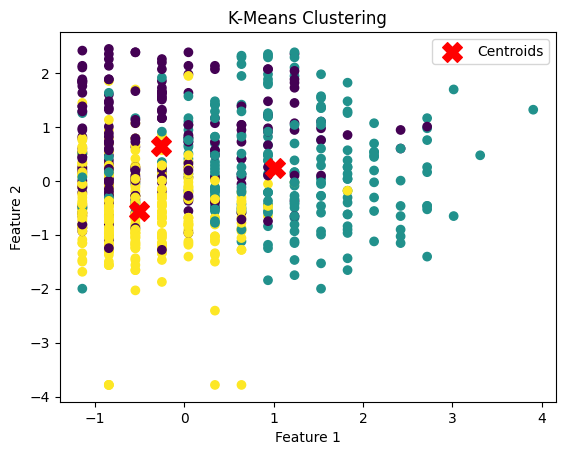

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np  # Import numpy to use np.unique

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features

# Feature Scaling: It's a good practice to scale features for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Apply K-Means clustering with k=3 (for example, we choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", kmeans.cluster_centers_)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (optional, for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**KMeans Manually**

Convergence reached after 17 iterations.
Cluster Centers (Centroids):
 [[ 1.08194386  0.2972029   0.42159496 -0.37996824 -0.38353716  0.06924224
  -0.04523723  1.14777824]
 [-0.35819002  0.55983946  0.22359726  0.89652484  0.97458723  0.62331635
   0.38707461 -0.22179196]
 [-0.46067918 -0.54843901 -0.41228464 -0.33221423 -0.37997137 -0.44368966
  -0.21923475 -0.59010462]]
Cluster Sizes: {np.int64(0): np.int64(215), np.int64(1): np.int64(216), np.int64(2): np.int64(337)}


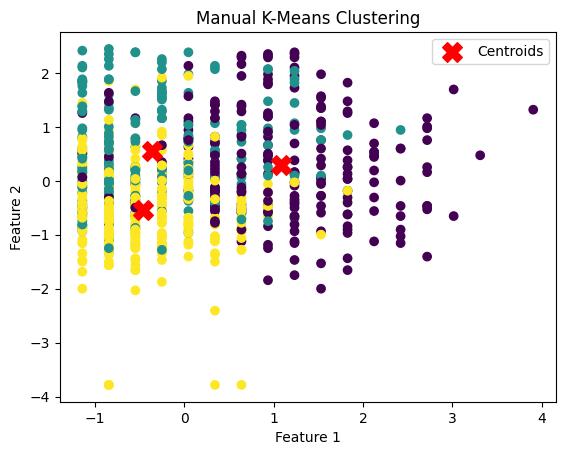

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive (2).csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features

# Feature Scaling: Scaling features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Manual K-Means clustering implementation
def initialize_centroids(X, k):
    """Randomly initialize k centroids"""
    np.random.seed(42)  # Set seed for reproducibility
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[random_indices]

def euclidean_distance(X, centroids):
    """Compute Euclidean distance between each point in X and each centroid"""
    # Formula: distance(x, c) = sqrt(sum((x_i - c_i)^2))
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return distances

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid"""
    distances = euclidean_distance(X, centroids)  # Calculate distances from points to centroids
    return np.argmin(distances, axis=1)  # Assign labels based on minimum distance

def update_centroids(X, labels, k):
    """Update centroids to be the mean of points in each cluster"""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        # Formula for updating centroid: c_i = (1/|S_i|) * sum(x_j)
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    """Main K-Means algorithm"""
    centroids = initialize_centroids(X, k)  # Initialize centroids randomly
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)  # Assign points to nearest centroid
        new_centroids = update_centroids(X, labels, k)  # Update centroids

        # Check for convergence (if centroids don't change significantly)
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Convergence reached after {i+1} iterations.")
            break
        centroids = new_centroids  # Update centroids for the next iteration

    return centroids, labels

# Run K-Means manually
k = 3  # Number of clusters
centroids, labels = kmeans(X_scaled, k)

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", centroids)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (for 2D visualization, using only the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Manual K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**Experiment 9 - PCA from Scratch**

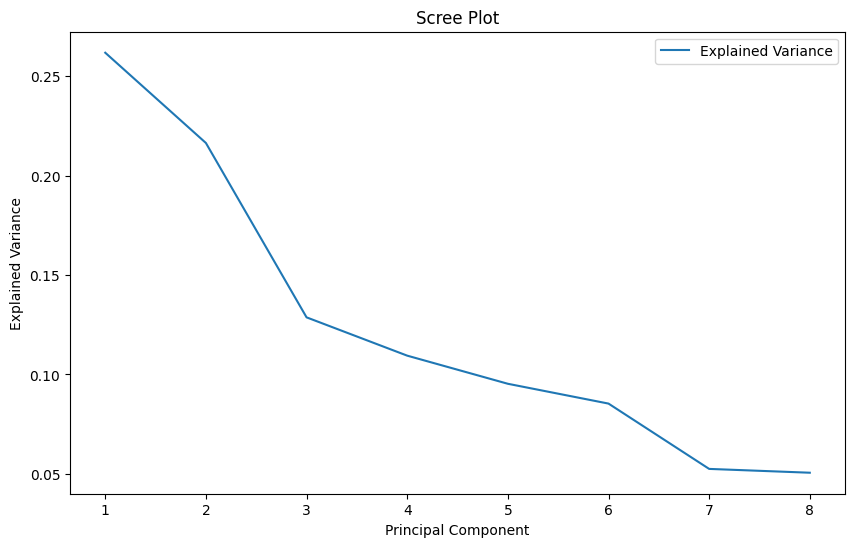

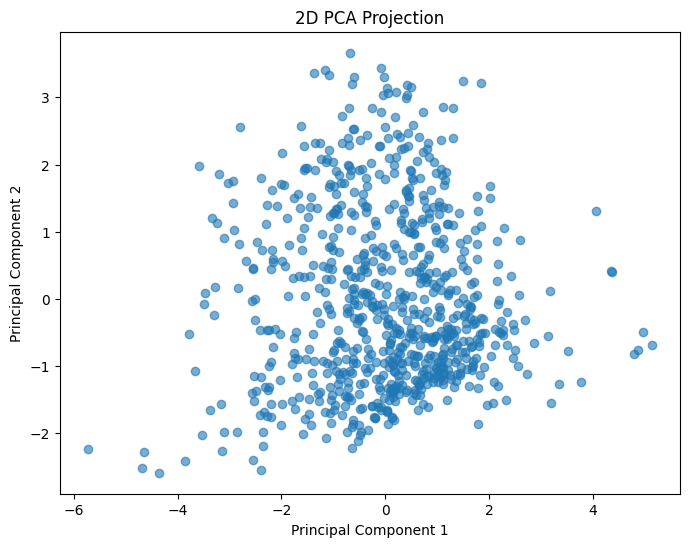

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your file path if needed)
df = pd.read_csv("/content/drive/MyDrive/MIT Classwork/archive (2).csv")

# Select features excluding the target column ('Outcome')
X = df.drop(columns=["Outcome"]).values

# Standardize the dataset
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Calculate covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors (top 2 components)
sorted_indices = np.argsort(eigenvalues)[::-1]
top_eigenvectors = eigenvectors[:, sorted_indices[:2]]

# Transform the data (reduce to 2 dimensions)
X_transformed = np.dot(X_standardized, top_eigenvectors)

# Scree Plot (Explained Variance)
plt.figure(figsize=(10, 6))
explained_variance = eigenvalues[sorted_indices] / np.sum(eigenvalues)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

# 2D Projection of Transformed Data
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


**Experiment 9 - PCA using ReadyMade Libraries**

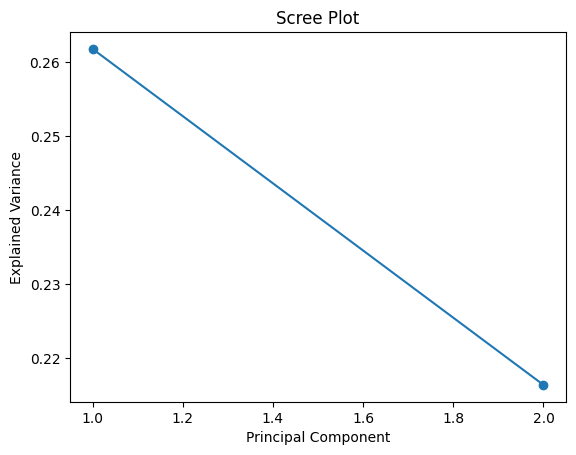

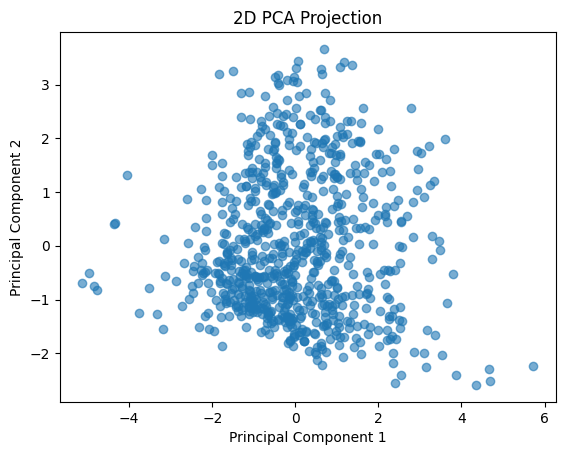

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and standardize the dataset
df = pd.read_csv("/content/drive/MyDrive/MIT Classwork/archive (2).csv")
X = StandardScaler().fit_transform(df.drop(columns=["Outcome"]))

# Apply PCA and transform the data to 2D
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Scree Plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

# 2D Projection
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


**Experiment 6 and 10 - Random Forest**

**Exoeriment 11 - Boosting**

**Experiment 12 - Performance Matrix / Evaluation**